## Assignment: Marketing - Sentiment Analysis


**1. GCP - Google Cloud Platform account created**

In [3]:
import urllib.parse
import requests
import pprint
import pandas as pd

In [4]:
# Read your Google Maps API key from Google Colab Notebook secret
from google.colab import userdata
googleMapsKey = userdata.get('google-maps-key')

**2. Google Maps Platform "Geocoding" and "New places" APIs**

In [5]:
# To initialize the gcloud CLI
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: sanilfernandes08@gmail.com
  project: poetic-maxim-424221-d0

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for this 
configuration:
 [1] sanilfernandes08@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [sanilfernandes08@gmai

In [6]:
# Enable the Cloud Natural Language API
!gcloud services enable language.googleapis.com

In [7]:
# Create local authentication credentials for your Google Account
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=Cb3rJ0DN1Z3d4nBuMrf1ks1sPugfkH&prompt=consent&token_usage=remote&access_type=offline&code_challenge=xHQzTPzSTivWRX607ViyyDrVXHcmCwli-o7zfvssmWg&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AdLIrYcznWwmRbXjDsE4ghnnM3aAX2HDK7ILKYcccUhOs6Ocd307mcft-TnBtbkqa4Ym2w

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [8]:
# Install the google-cloud-language package
!pip install google-cloud-language

# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

**3. Retrieving reviews using the Google Maps Platform API**

In [95]:
def geoCodePlace(place):
    """Returns the geoCodedPlace for the given place"""

    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"address": place, "key": googleMapsKey}
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

# Define the place
place = "Kingston Waterfront"

# Get the geoCodedPlace
geoCodedPlace = geoCodePlace(place)
print("\nThis is the geoCodedPlace:")
pprint.pprint(geoCodedPlace)


This is the geoCodedPlace:
{'results': [{'address_components': [{'long_name': 'Kingston Waterfront',
                                      'short_name': 'Kingston Waterfront',
                                      'types': ['establishment',
                                                'park',
                                                'point_of_interest',
                                                'tourist_attraction']},
                                     {'long_name': 'Waterfront Pathway',
                                      'short_name': 'Waterfront Pathway',
                                      'types': ['route']},
                                     {'long_name': 'Kingston',
                                      'short_name': 'Kingston',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Kingston',
                                      'short_name': 'Kingston',
                          

In [96]:
# Get the place id
place_id = geoCodedPlace["results"][0]["place_id"]
print("\nThis is the place id:")
print(place_id)


This is the place id:
ChIJCUkM8Puq0kwRzBQkUeCPn7o


In [97]:
def getPlaceDetails(place_id):
    """Returns the place details for the given place id"""

    url = "https://places.googleapis.com/v1/places/{}".format(place_id)
    params = {
        "fields": "id,displayName,rating,userRatingCount,reviews",
        "key": googleMapsKey,
    }
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

# Get the place details
placeDetails = getPlaceDetails(place_id)
print("\nThese are the place details:")
pprint.pprint(placeDetails)


These are the place details:
{'displayName': {'languageCode': 'fi', 'text': 'Kingston Waterfront'},
 'id': 'ChIJCUkM8Puq0kwRzBQkUeCPn7o',
 'rating': 4.7,
 'reviews': [{'authorAttribution': {'displayName': 'Anthony Ceretti',
                                    'photoUri': 'https://lh3.googleusercontent.com/a-/ALV-UjUbvZzOv2dEEKoZ8kUcO8oeSsP9sK051QKv6bX8rGkCFoNfg6oLrw=s128-c0x00000000-cc-rp-mo-ba7',
                                    'uri': 'https://www.google.com/maps/contrib/114636623860990639776/reviews'},
              'name': 'places/ChIJCUkM8Puq0kwRzBQkUeCPn7o/reviews/ChdDSUhNMG9nS0VJQ0FnSURac3I2OXBnRRAB',
              'originalText': {'languageCode': 'en',
                               'text': 'What an amazing place and waterfront! '
                                       'I wish Belleville could have something '
                                       'close to what Kingston has. There is '
                                       'so much more to do, and the waterfront '
      

In [98]:
# Create an empty DataFrame with the required columns
df_reviews = pd.DataFrame(columns=['publishTime', 'displayName', 'originalText', 'rating'])

# Extract reviews and populate the DataFrame
for review in placeDetails['reviews']:
    review_data = {
        'publishTime': review['publishTime'],
        'displayName': review['authorAttribution']['displayName'],
        'originalText': review['originalText']['text'],
        'rating': review['rating']
    }
    df_reviews.loc[len(df_reviews)] = review_data

In [99]:
# Display the DataFrame
print(df_reviews)

            publishTime      displayName  \
0  2023-09-28T01:22:11Z  Anthony Ceretti   
1  2023-11-14T03:41:08Z       Kemi Chima   
2  2023-09-17T22:21:43Z        Hugo Kong   
3  2023-08-01T23:24:57Z               DH   
4  2023-02-20T22:29:16Z    Juliet Martin   

                                        originalText  rating  
0  What an amazing place and waterfront! I wish B...       5  
1  Had a brief stop here on my way to Ottawa from...       5  
2  While strolling along the Kingston waterfront,...       5  
3  The Kingston Waterfront is a beautiful place t...       5  
4  Beautiful place for a scenic walk with plenty ...       4  


In [100]:
# Save DataFrame as CSV
df_reviews.to_csv('reviews.csv', index=False)

**4. Sentiment Analysis on each review using GCP**

In [105]:
# The text to analyze
text = "What an amazing place and waterfront!"
document = language_v1.types.Document(
    content=text, type_=language_v1.types.Document.Type.PLAIN_TEXT
)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(
    request={"document": document}
).document_sentiment

print(f"Text: {text}")
print(f"Sentiment: {sentiment.score}, {sentiment.magnitude}")

Text: What an amazing place and waterfront!
Sentiment: 0.8999999761581421, 0.8999999761581421


In [106]:
# Load the existing CSV file
df_reviews = pd.read_csv('reviews.csv')

In [107]:
# Detects the sentiment of the text
def analyze_sentiment(text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
    return sentiment.score, sentiment.magnitude

In [108]:
# Add sentiment and magnitude to each review
df_reviews['sentiment'] = None
df_reviews['magnitude'] = None

for index, row in df_reviews.iterrows():
    text = row['originalText']
    sentiment_score, sentiment_magnitude = analyze_sentiment(text)
    df_reviews.at[index, 'sentiment'] = sentiment_score
    df_reviews.at[index, 'magnitude'] = sentiment_magnitude

In [109]:
# Display the updated DataFrame
print(df_reviews)

            publishTime      displayName  \
0  2023-09-28T01:22:11Z  Anthony Ceretti   
1  2023-11-14T03:41:08Z       Kemi Chima   
2  2023-09-17T22:21:43Z        Hugo Kong   
3  2023-08-01T23:24:57Z               DH   
4  2023-02-20T22:29:16Z    Juliet Martin   

                                        originalText  rating sentiment  \
0  What an amazing place and waterfront! I wish B...       5       0.7   
1  Had a brief stop here on my way to Ottawa from...       5       0.2   
2  While strolling along the Kingston waterfront,...       5       0.6   
3  The Kingston Waterfront is a beautiful place t...       5       0.8   
4  Beautiful place for a scenic walk with plenty ...       4       0.4   

  magnitude  
0       5.0  
1       2.0  
2       5.6  
3       2.4  
4       0.9  


**5. Saving dataframe as a CSV file**

In [110]:
# Save the updated DataFrame back to a CSV file
df_reviews.to_csv('reviews_with_sentiment.csv', index=False)

**6. Compute the Sentiment and Magnitude average.**

In [111]:
# Compute Sentiment and Magnitude averages
average_sentiment = df_reviews['sentiment'].mean()
average_magnitude = df_reviews['magnitude'].mean()

In [112]:
print(f"Average Sentiment: {average_sentiment}")
print(f"Average Magnitude: {average_magnitude}")

Average Sentiment: 0.5400000065565109
Average Magnitude: 3.1799999952316282


**7. Visualizing, Findings and recommendations**

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Load the CSV file with sentiment data
df_reviews = pd.read_csv('reviews_with_sentiment.csv')

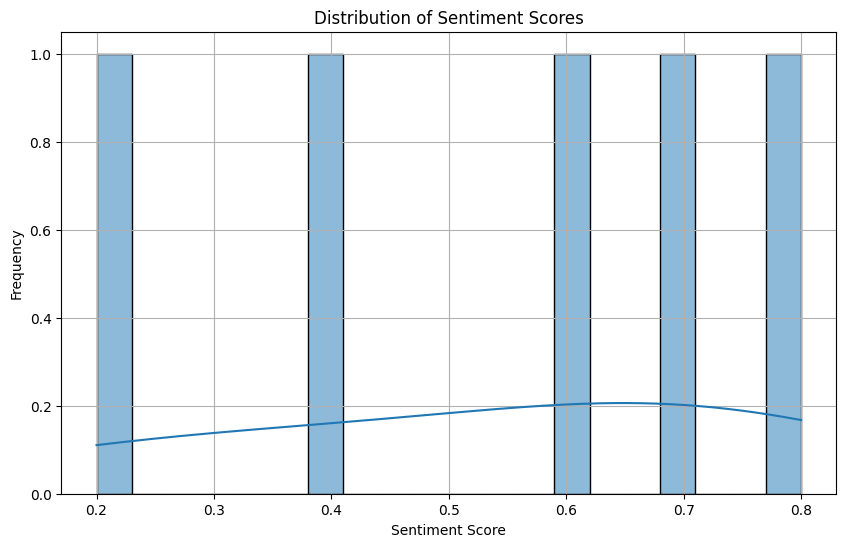

In [115]:
# Visualization 1: Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

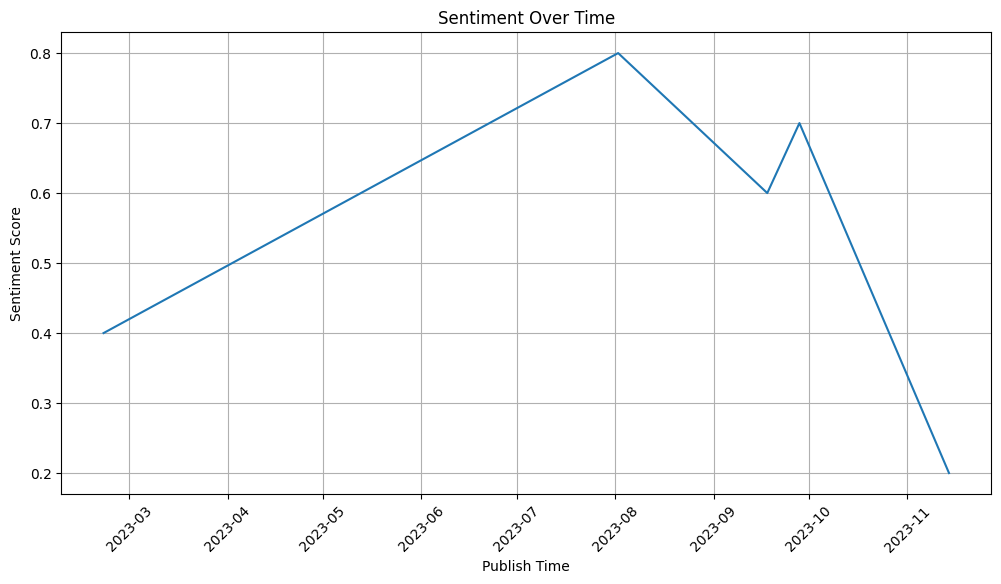

In [116]:
# Visualization 2: Sentiment Over Time
df_reviews['publishTime'] = pd.to_datetime(df_reviews['publishTime'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.lineplot(x='publishTime', y='sentiment', data=df_reviews)
plt.title('Sentiment Over Time')
plt.xlabel('Publish Time')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

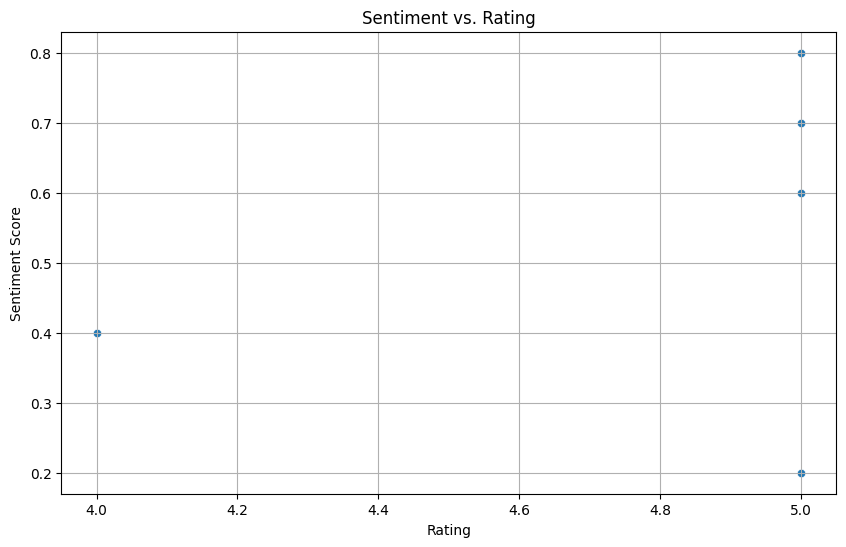

In [117]:
# Visualization 3: Sentiment vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='sentiment', data=df_reviews)
plt.title('Sentiment vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

## Report

**Introduction**

This report presents an analysis of customer reviews for Kingston Waterfront, focusing on sentiment scores, ratings, and trends over time.

**Data Collection and Preparation**

The data for this report was collected using the Google Maps API, extracting reviews and performing sentiment analysis using Google's Natural Language API.

**Visualizations and Findings**
1. **Sentiment Score Distribution:** The sentiment scores are distributed with a peak around positive sentiments, indicating generally favorable reviews.
There are a few negative sentiment scores, suggesting some dissatisfaction among a minority of reviewers.
2. **Sentiment Over Time:** The sentiment scores fluctuate over time.
Positive sentiment scores are more frequent and consistent over time, with occasional dips into negative sentiment.
3. **Sentiment vs. Rating:** There is a positive correlation between ratings and sentiment scores, indicating that higher ratings are generally associated with more positive sentiment. Some high ratings have lower sentiment scores, suggesting that even when people rate the place highly, they may still have some negative feedback.
4. **Average Sentiment and Magnitude**
*   The average sentiment score is 0.54
*   The average magnitude score is 3.17

**Recommendations**
*   Address Negative Reviews
*   Monitor Sentiment Over Time
*   Encourage Positive Reviews

**Conclusion**

The analysis of customer reviews provides valuable insights into customer satisfaction and areas for improvement. By focusing on addressing negative feedback and maintaining positive aspects, the Marketing Manager can enhance the overall customer experience. Regular monitoring and proactive engagement with customers are key to sustaining high sentiment scores and positive ratings.